In [3]:
pip install math

^C
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
# First let's start with calling all the dependencies for this project 
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

In [2]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.shape

(200000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
#find any null value present
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
#drop null rows
df.dropna(axis=0,inplace=True)
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [7]:
#Calculatin the distance between the pickup and drop co-ordinates 
#using the Haversine formual for accuracy.
def haversine (lon_1, lon_2, lat_1, lat_2):
    
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians
    
    
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    

    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + 
                                      np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    
    return km


In [8]:
#find distance travelled per ride
df['Distance']= haversine(df['pickup_longitude'],df['dropoff_longitude'],
                             df['pickup_latitude'],df['dropoff_latitude'])


In [9]:
#round it to 2 decimal points
df['Distance'] = df['Distance'].astype(float).round(2) 
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,24238194,2015-05-07 19:52:06,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,27835199,2009-07-17 20:04:56,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,44984355,2009-08-24 21:45:00,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,25894730,2009-06-26 08:22:21,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,17610152,2014-08-28 17:47:00,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.48


Text(0, 0.5, 'fare_amount')

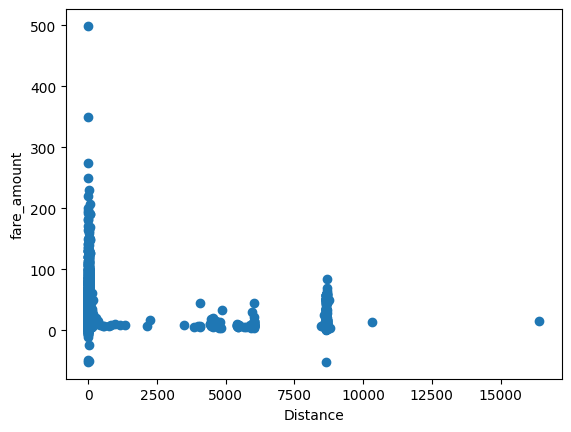

In [10]:
plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [11]:
#Outliers
#We can get rid of the trips with very large distances that are outliers
# as well as trips with 0 distance.
df.drop(df[df['Distance'] > 60].index, inplace = True)
df.drop(df[df['Distance'] == 0].index, inplace = True)
df.drop(df[df['fare_amount'] == 0].index, inplace = True)
df.drop(df[df['fare_amount'] < 0].index, inplace = True)
df.shape

(193490, 10)

<class 'pandas.core.frame.DataFrame'>
Index: 193481 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         193481 non-null  int64  
 1   key                193481 non-null  object 
 2   fare_amount        193481 non-null  float64
 3   pickup_datetime    193481 non-null  object 
 4   pickup_longitude   193481 non-null  float64
 5   pickup_latitude    193481 non-null  float64
 6   dropoff_longitude  193481 non-null  float64
 7   dropoff_latitude   193481 non-null  float64
 8   passenger_count    193481 non-null  int64  
 9   Distance           193481 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 16.2+ MB


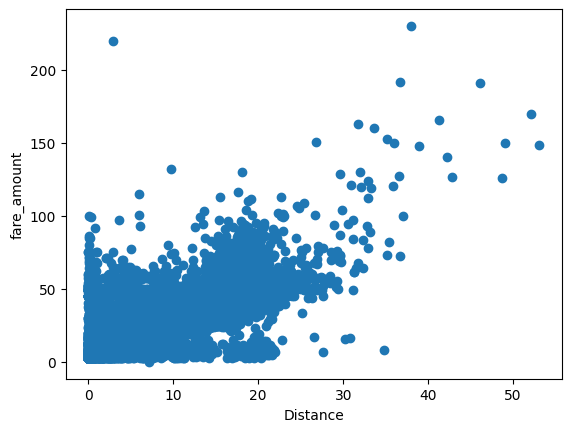

In [12]:
# removing rows with non-plausible fare amounts and distance travelled
df.drop(df[(df['fare_amount']>100) & (df['Distance']<1)].index, inplace = True )
df.drop(df[(df['fare_amount']<100) & (df['Distance']>100)].index, inplace = True )
df.shape

plt.scatter(df['Distance'], df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

df.info()

In [13]:
# Create New DataFrame of Specific column
df2 = pd.DataFrame().assign(fare=df['fare_amount'], Distance=df['Distance'])
df2.info()

df2.shape

<class 'pandas.core.frame.DataFrame'>
Index: 193481 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   fare      193481 non-null  float64
 1   Distance  193481 non-null  float64
dtypes: float64(2)
memory usage: 4.4 MB


(193481, 2)

/tmp/ipykernel_9379/3419807447.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['fare'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)


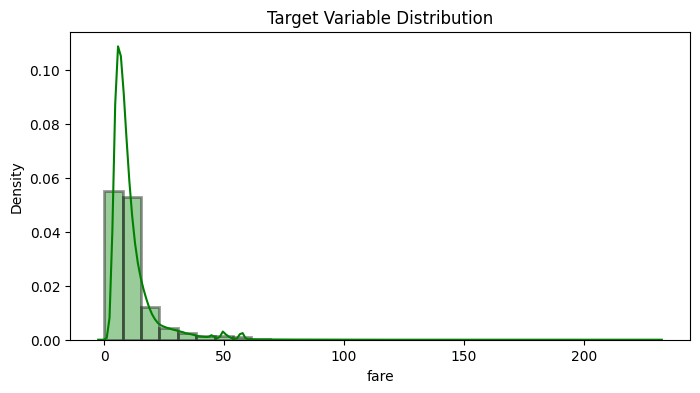

In [14]:
# plot target fare distribution 
plt.figure(figsize=[8,4])
sns.distplot(df2['fare'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution')
plt.show()

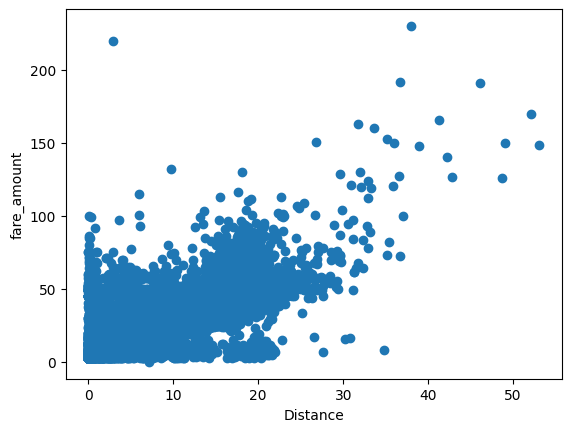

In [15]:
#plots
plt.scatter(df2['Distance'], df2['fare'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")


x=df2['fare']
y=df2['Distance']


In [16]:
#independant variable
X = df2['Distance'].values.reshape(-1, 1) 

#dependant variable
Y= df2['fare'].values.reshape(-1, 1)

In [17]:
# scale by standardscalar
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(Y)
x_std = std.fit_transform(X)


In [18]:
#split in test-train 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)

In [19]:
#simple linear regression
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

LinearRegression()

In [20]:
#predict test values
y_pred = l_reg.predict(X_test)

In [21]:
#find the error
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2397901988203623
Mean Squared Error: 0.19845894112525958
Root Mean Squared Error: 0.44548730747941584


Text(0.5, 0, 'Distance')

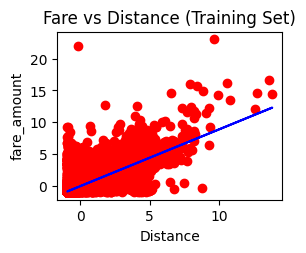

In [22]:
#final plot
plt.subplot(2, 2, 1)
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.title("Fare vs Distance (Training Set)")
plt.ylabel("fare_amount")
plt.xlabel("Distance")

Text(0.5, 1.0, 'Fare vs Distance (Test Set)')

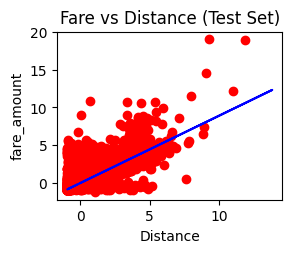

In [23]:
plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.title("Fare vs Distance (Test Set)")